In [3]:
include("src\\ImportanceSampling.jl")
using Distributions
using ImportanceSampling
using Seaborn

## poisson

In [38]:
function gen_w_poisson(λ0::Real, λ::Real)
    C = exp(λ-λ0)
    r= λ0/λ
    return (x::AbstractVector{<:Real}) -> C*r^first(x)
end

f!(r, x) = copy!(r, x)

f! (generic function with 1 method)

In [40]:
nmeans = 12
λ0s = linspace(0.25, 3, nmeans)
q = Poisson()
ws = [gen_w_poisson(λ0, 1) for λ0 in λ0s]
;

In [ ]:
ntrials = 10
niters = 10_000
iss = Matrix(ntrials, nmeans)

for i in 1:nmeans
    for tr in 1:ntrials
        iss[tr, i] = ImportanceSampler(f!, 1, q, w=ws[i])
        update!(iss[tr, i]; niters=niters, batchsize=500)
    end
    print(i, " ")
end

1 2 3 4 5 6 7 8 

In [84]:
ms = first.(mean.(iss))
vs = first.(var.(iss))
nes = ne.(iss)
neσs = neσ.(iss)

est_v = vec(var(ms, 1))
ms_avg = vec(mean(ms, 1))
vs_avg = vec(mean(vs, 1))
nes_avg = vec(mean(nes, 1))
neσs_avg = vec(mean(neσs, 1))
;

In [85]:
m = zeros(1)
Σ = eye(1)
Λ = inv(1)
m0s_pred = linspace(first(m0s), last(m0s), 100)
nes_pred = niters * [exp(dot(m0, Λ*m0) - 1/2*dot(m, Λ*m)-1/2*dot(2*m0-m, Λ*(2*m0-m))) for m0 in m0s_pred];

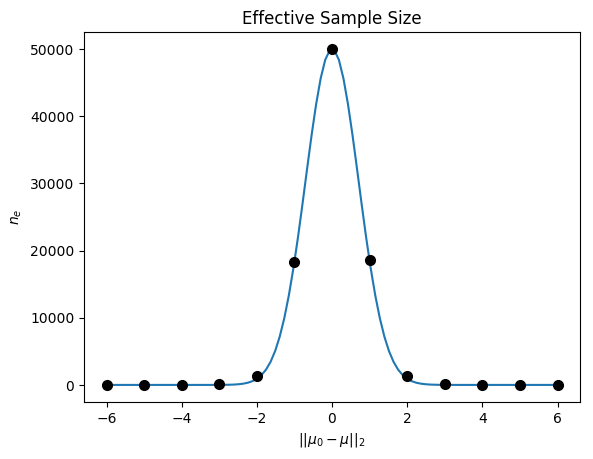

In [86]:
plot(m0s_pred, nes_pred) 
plot(m0s, nes_avg, "ko", ms=7)
title("Effective Sample Size")
xlabel(L"||\mu_0 - \mu ||_2")
ylabel(L"n_e")
;

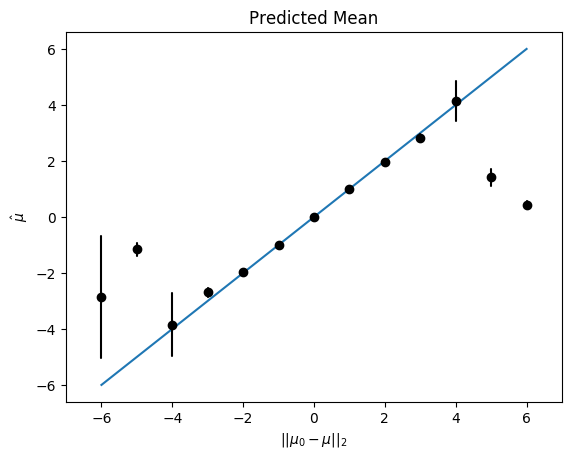

In [87]:
plot([first(m0s), last(m0s)], [first(m0s), last(m0s)]) 
tsplot(ms, m0s, err_style="ci_bars", interpolate=false, color="k")
title("Predicted Mean")
xlabel(L"||\mu_0 - \mu ||_2")
ylabel(L"\hat \mu")
;

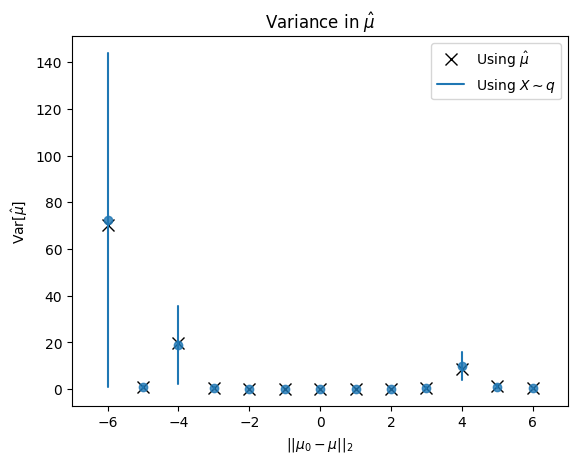

PyObject <matplotlib.legend.Legend object at 0x0000000039DA4B70>

In [88]:
plot(m0s, est_v, "kx", ms="9")
tsplot(vs, m0s, err_style="ci_bars", interpolate=false, alpha=0.8)
title("Variance in " * L"\hat \mu")
xlabel(L"||\mu_0 - \mu ||_2")
ylabel(L"\mathrm{Var}[\hat \mu]")
legend(["Using " * L"\hat \mu", "Using " * L"X \sim q"])